In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
from sklearn.model_selection import train_test_split


In [85]:

df = pd.read_excel('ratings_movies.xlsx', names = range(0,15))
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
2,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
5,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
8,4,4,4,4,4,4,2,2,2,4,4,4,1,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1,1


In [86]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [87]:
import os, sys
import json


In [88]:
Y= df.astype(float).values
R= R= df.applymap(lambda x: 0 if np.isnan(x) else 1)
print(Y.shape)
R


(14, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
def J (Y, R, X,Theta, lambd): 
    '''
    params: 1d vector  of X and Theta 
    :return expression for cost function 
    '''
    
    assert(X.shape[1]==Theta.shape[0])
    h= X @ Theta 


    try: 
        assert(h.shape ==Y.shape)
    except:
        print ('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape) )

       
    J= 1/2 * np.sum(((h-Y)*R) **2) + lambd/2 * np.sum(X**2) + lambd/2 * np.sum(Theta**2)

    try: 
        assert(len(J.shape)== 0)
    except:
        print ('J is not raw number. J.shape = ', J.shape)
    
    return J
def J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd): 
   
    cost_matr= (X @ Theta - Y) * R #  n_movies * n_users 

    X_grad= cost_matr @ Theta.T 
    Theta_grad= (cost_matr.T @ X).T
    
   
    try: 
        assert(X_grad.shape ==X.shape)
        assert(Theta_grad.shape ==Theta.shape)
    except:
        print ('Check gradient calculus')

    # Regularization part :          
    X_grad  += lambd * X
    Theta_grad += lambd * Theta

    
    return X_grad, Theta_grad
def fit(Y,R, num_features= 10,  alpha=0.0001, lambd= .01, eps= .1,  max_iter=1000,step=100, verbose=0):    
    num_movies,num_users =Y.shape
    
    
    if verbose: 
        print ('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))
        

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn( num_features, num_users)
    
    J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True # flag to continue next iter (grad desc step)
    iter_number =0 # used for limit by max_iter

    while continue_iter:            
        # Do step of gradient descent    
        X_grad, Theta_grad =  J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd)
        X= X- alpha  *X_grad        
        Theta= Theta- alpha  *Theta_grad

        # keep history of J values
        J_hist.append(J(Y, R, X,Theta, lambd))
        # check criteria of exit (finish grad desc)
        if iter_number> max_iter: # if limit succeeded
            continue_iter = False
            print ('iter_number> max_iter')
        elif np.abs(J_hist[iter_number-1] - J_hist[iter_number])< eps: # if accuracy is succeeded
            continue_iter = False
            print ('J_hist[iter_number]={}'.format(J_hist[iter_number]))
        iter_number += 1
        
        if verbose and iter_number%step ==0:
            print ('{}: {}'.format(iter_number, J_hist[iter_number-1]))
    
    return X,Theta, J_hist

In [90]:
X, Theta, J_hist = fit(Y, R.values, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 881.440918637686
100: 371.5360820848714
150: 255.47350839819413
200: 223.08492323522256
250: 206.3800813736131
300: 194.71523680349247
350: 185.4263290204056
400: 177.5251739809189
450: 170.5515785253546
500: 164.25808279510855
550: 158.4973817340347
600: 153.17472459555887
650: 148.2252382680119
700: 143.60211526591746
750: 139.27002441410286
800: 135.2012327696204
850: 131.37322355346092
900: 127.76718079047188
950: 124.36699625919863
1000: 121.15860156973729
1050: 118.12950820371154
1100: 115.26848371131533
1150: 112.5653188970537
1200: 110.0106569391319
1250: 107.59586538511999
1300: 105.31293830695259
1350: 103.15441999701474
1400: 101.11334428176775
1450: 99.18318532793718
1500: 97.35781703315155
1550: 95.63147892644407
1600: 93.99874708147384
1650: 92.45450894957997
1700: 90.99394130560088
1750: 89.61249070338283
1800: 88.30585598483819
1850: 87.06997249322608
1900: 85.9009977196992
1950: 84.79

Text(0, 0.5, 'Cost')

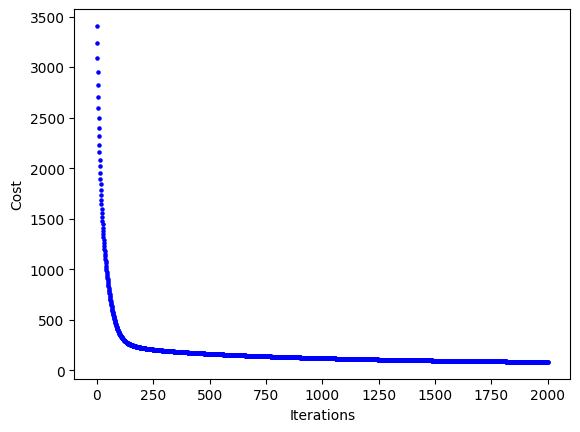

In [91]:
import matplotlib.pyplot as plt
J_hist=J_hist[1:]
plt.figure()
plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [92]:
pred= X @ Theta
pred

array([[4.79515693, 4.78913416, 4.75570709, 1.1538146 , 1.1880496 ,
        1.1935583 , 1.0585899 , 1.04591774, 1.07974026, 4.78170444,
        4.7663767 , 4.7407754 , 1.91429415, 1.9217908 , 1.87319225],
       [4.75161516, 4.7526212 , 4.73061645, 1.16332332, 1.15630685,
        1.2122621 , 1.05191157, 1.05375851, 1.02743646, 4.80470151,
        4.82413795, 4.7559771 , 1.88895192, 1.91851606, 1.89048247],
       [2.98401332, 2.98974222, 2.97475834, 4.77838076, 4.75101584,
        4.80779182, 1.09475428, 1.079234  , 1.08177503, 4.85117016,
        4.90596165, 4.85170514, 0.91739503, 0.95476047, 0.95548995],
       [3.05310223, 3.05874968, 2.99634648, 4.8048295 , 4.85742488,
        4.8089819 , 1.1552181 , 1.08828335, 1.1841005 , 4.79367568,
        4.74066875, 4.75741789, 1.02601558, 0.97233675, 0.95556894],
       [3.04995518, 3.01786578, 3.02506008, 4.74462381, 4.78354143,
        4.69381903, 1.15621713, 1.13015714, 1.17176155, 4.84307521,
        4.75276161, 4.86328315, 1.02898012, 

In [93]:
diff_train = np.array(pred-Y)
print ('Training:', np.abs(diff_train).max(), np.abs(diff_train).mean())

Training: 0.30618096730499733 0.11714197597374432


(array([14., 28., 21., 21., 29., 30., 32., 21.,  7.,  7.]),
 array([-0.30618097, -0.25390783, -0.2016347 , -0.14936157, -0.09708843,
        -0.0448153 ,  0.00745783,  0.05973096,  0.1120041 ,  0.16427723,
         0.21655036]),
 <BarContainer object of 10 artists>)

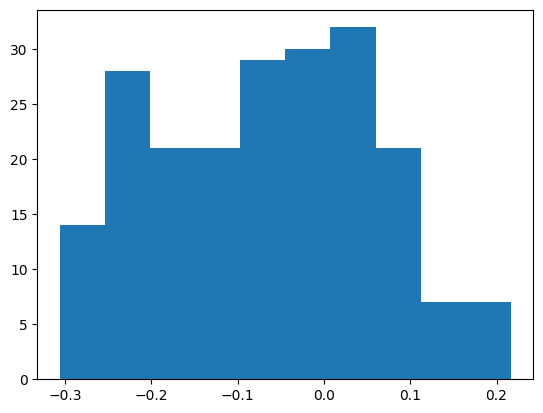

In [94]:
plt.hist(diff_train.ravel())